# Pythonでチップチューン音楽を作ろう



In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Audio

## sin波

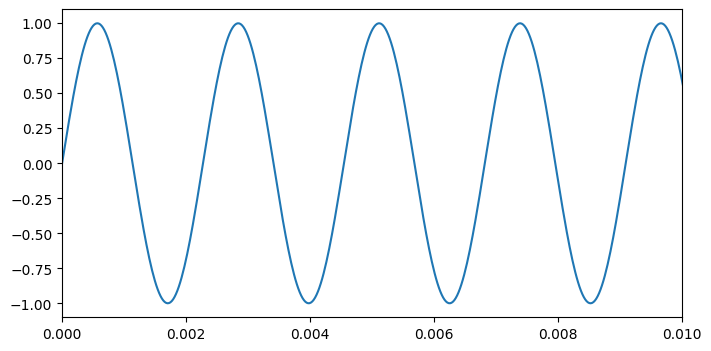

In [2]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = np.sin(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

## 矩形波

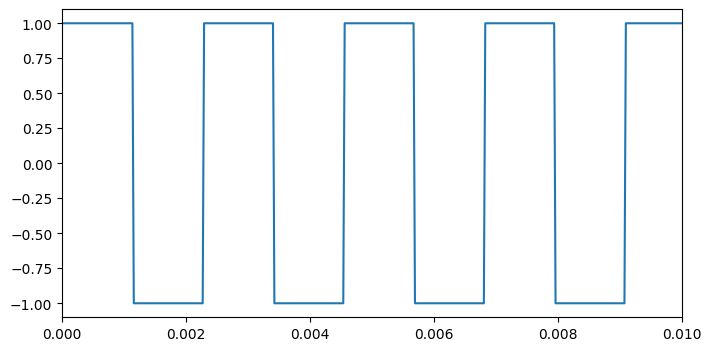

In [3]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = sp.signal.square(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

## 三角波

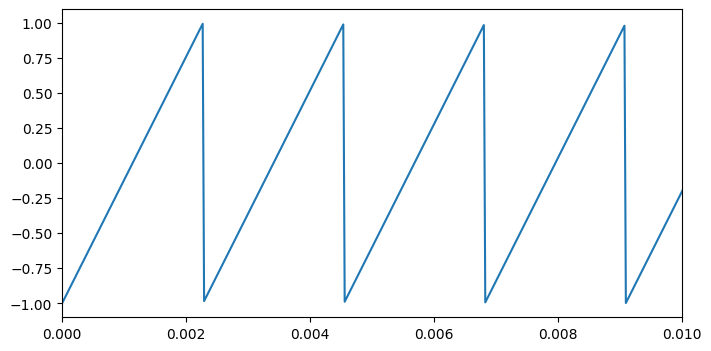

In [4]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = sp.signal.sawtooth(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

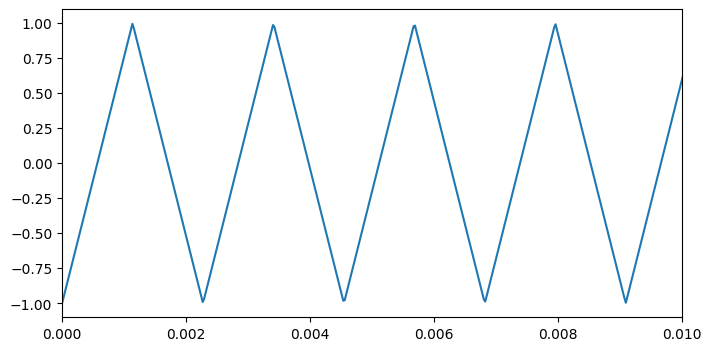

In [5]:
freq, sr, sec = 440, 44100, 1
t = np.arange(0, sec, 1/sr)
y = sp.signal.sawtooth(2 * np.pi * freq * t, width=0.5)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

## 音程

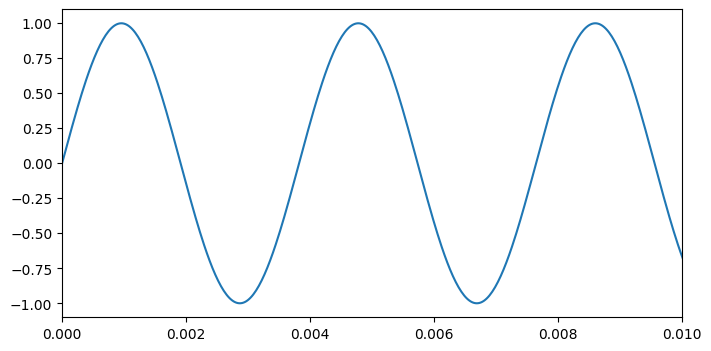

In [6]:
A4 = 440
A4_num = 69

sr, sec = 44100, 1

c4_num = 60
freq = A4 * 2 ** ((c4_num - A4_num) / 12)

t = np.arange(0, sec, 1/sr)
y = np.sin(2 * np.pi * freq * t)
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.xlim(0, 0.01)
Audio(y, rate=sr)

## munotes

In [7]:
import munotes as mn

In [8]:
note = mn.Note("C4")
note.play("sin")

In [9]:
famima = mn.Track([
    ("G5", 0.5),
    ("Eb5", 0.5),
    (mn.Notes("Bb4", "G4"), 0.5),
    ("Eb5", 0.5),
    (mn.Notes("D5", "F5"), 0.5),
    ("Bb5", 1),
    ("Bb4", 0.5),
    (mn.Notes("Bb4", "F5"), 0.5),
    ("G5", 0.5),
    (mn.Notes("Bb4", "F5"), 0.5),
    ("Bb4", 0.5),
    (mn.Notes("G4", "Eb5"), 1),
], unit="ql", bpm=80)
famima.play("square")

## music21

In [10]:
import music21 as m21

In [14]:
song = m21.converter.parse('midi/jokyoku.mid')
bpm = 120

stream = mn.Stream([])
for part in song:
    if isinstance(part, m21.metadata.Metadata):
        continue
    track = mn.Track([], unit='ql', bpm=bpm)
    for event in part.flatten().notesAndRests:
        ql = event.quarterLength
        if isinstance(event, m21.note.Rest):
            track.append((mn.Rest(), ql))
        else:
            notes = mn.Notes(*[note.midi for note in event.pitches])
            track.append((notes, ql))

    stream.append(track)

In [15]:
stream.play(['square', 'square', 'sawtooth'], width=0.5)